# Neural Network - Practical Lesson 8

## Overview
In this lesson we will see how machine learning techniques can be successfully applied to solve financial problems. We will first do a quick tour on the theory behind neural networks and then we will see an example and two practical applications: regression and classification.

## Neural networks

### Definition
Artificial Neural Networks (ANN) are information processing models that are developed by inspiring from the working principles of human brain. Their most essential property is the ability of learning from sample sets. The basic process units of ANN architecture are neurons which are internally in connection with other neurons. 

![Model of an artificial neuron.](neuron.jpeg)

A neuron consists of weights ($w_i$) and real ($x_i$) numbers. All inputs injected into neurons are individually weighted, added together and passed into the activation function. There are many different types of activation function but one of the simplest would be step function (another is the sigmoid). 

![Step function.](step_function.png)
![Sigmoid function.](sigmoid.png)

The activation function is then responsible to provide the neuron output.

### Training of a neuron

When teaching children how to recognize a bus, we just tell them, showing an example: “This is a bus. That is not a bus.” until they learn the concept of what a bus is. 
Furthermore, if the child sees new objects that she hasn’t seen before, we could expect her to recognize correctly whether the new object is a bus or not.
This is exactly the idea behind the neurons.
Similarly, inputs from a *training* set are presented to the neuron one after the other and weights are modified according to the expected output.

When an entire pass through all of the input training vectors is completed the neuron has learnt ! At this time, if an input vector P (already in the training set) is given to the neuron, it will output the correct value. If P is not in the training set, the network will respond with an output similar to other training vectors close to P.

Unfortunately using just a neuron is not too useful since it is not possible to solve
the interesting problems we would like to face. The next step is then to put together more neurons together in *layers*.

### Multi-layered neural networks

![A multi-layered neural network.](multilayer.jpeg)

Each input from the *input layer* is fed up to each node in the hidden layer, and from there to each node on the output layer. We should note that there can be any number of nodes per layer and there are usually multiple hidden layers to pass through before ultimately reaching the output layer.
But to train this network we need a learning algorithm which should be able to tune not only the weights between the output layer and the hidden layer but also the weights between the hidden layer and the input layer.

### Back propagation

First of all, we need to understand what do we lack. To tune the weights between the hidden layer and the input layer, we need to know the error at the hidden layer, but we know the error only at the output layer (we know the correct output from the training sample and we also know the output predicted by the network.)
So, the method that was suggested was to take the errors at the output layer and proportionally propagate them backwards to the hidden layer.

So, what we are doing is:

* we present a training sample to the neural network (initialised with random weights);
* compute the output received by calculating activations of each layer and thus calculate the error;
* having calculated the error, we readjust the weights such that the error decreases;
* we continue the process for all training samples several times until the weights are not changing too much.

## Neural net to recognize handwritten digits

We don't usually appreciate how tough a problem our visual system solve (it involves 5 visual cortices containing 140 million neurons each). 
The difficulty of visual pattern recognition becomes apparent if you attempt to write a computer program to recognize digits like those below. 

![The so-called MNIST training sample](mnist_100_digits.png)

Simple intuitions about how we recognize shapes - "a 9 has a loop at the top, and a vertical stroke in the bottom right" - turn out to be not so simple to express algorithmically. When you try to make such rules precise, you quickly get lost in a morass of exceptions and caveats and special cases. It seems hopeless.

Neural networks approach the problem in a different way. The idea is to take a large number of handwritten digits and then develop a system which can learn from those training examples. By increasing the number of training examples, the network can learn more about handwriting, and so improve its accuracy. So while I've shown just 100 training digits above, perhaps we could build a better handwriting recognizer by using thousands or even millions or billions of training examples (**remember that neural nets are not capable of extrapolating results !!!**).

Let's try to implement an ANN that is capable of recognize handwritten digits.
To start we need to install three new modules:

* if using anaconda on your laptop open an anaconda-shell and type the following:
```pip install keras, mnist, tensorflow```

* if using repl the first time you run your program it should automatically update your python repository. 

Our program will be based on a Convolutional Neural Network (CNN, will see later other two types of NN) which is designed for image/pattern recognition. It works essentially by applying on top of an image a series of filters (matrices) that works as edge detectors and with them it classifies images according to their features.

![](edges.jpg)

In [1]:
import numpy as np
# contains our dataset for training
import mnist 
# keras gives us all the tools to work with NN
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.utils import to_categorical

# load the training and testing set
train_images = mnist.train_images() # the actual images
train_labels = mnist.train_labels() # the truth (it is 0, 1, 2...)

# transform data for convenience
train_images = (train_images / 255) - 0.5
train_images = np.expand_dims(train_images, axis=3)

# definition of the actual network
num_filters = 8
filter_size = 3
pool_size = 2

# the input size reflects the size of the image with
# the numbers 28x28 pixels
# the output is given by 10 neurons returning the 
# probability that image is in each class.
model = Sequential([
    Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)), 
    MaxPooling2D(pool_size=pool_size),
    Flatten(),
    Dense(10, activation="softmax")
])

model.compile('adam', loss="categorical_crossentropy",
              metrics=['accuracy'])

model.fit(train_images,
          to_categorical(train_labels),
          epochs=3)#,
          #validation_data=(test_images, to_categorical(test_labels)))
    
model.save('digit_training.h5')

Using TensorFlow backend.
/home/sani/.python3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sani/.python3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sani/.python3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sani/.python3/lib/python3.7/site-packages/tensorflow/python



Epoch 1/3
60000/60000 [==============================] - 10s 165us/step - loss: 0.3523 - accuracy: 0.8982
Epoch 2/3
60000/60000 [==============================] - 10s 159us/step - loss: 0.1720 - accuracy: 0.9507
Epoch 3/3
44448/60000 [=====================>........] - ETA: 2s - loss: 0.1254 - accuracy: 0.9638

KeyboardInterrupt: 

Let's try to see how well our NN predicts MNIST testing digits.

In [4]:
import numpy as np
import mnist
from keras.models import load_model

model = load_model('digit_training.h5')

# testing with mnist test sample
test_images = mnist.test_images()
test_labels = mnist.test_labels()

test_images = (test_images / 255) - 0.5
test_images = np.expand_dims(test_images, axis=3)

predictions = model.predict(test_images[:5])
print ("Tesing on MNIST digits...")
print("Predicted: ", np.argmax(predictions, axis=1)) 
print("Truth:", test_labels[:5])
print("%:", ["{:.3f}".format(p[np.argmax(p)]) for p in predictions])

Tesing on MNIST digits...
Predicted:  [7 2 1 0 4]
Truth: [7 2 1 0 4]
%: ['1.000', '0.992', '0.999', '0.999', '0.999']


To see how well our NN behaves with different kind of digits we will try to check how it works with my own calligraphy.

* Open `paint` and create a 280x280 white square
* Change brush type and set the maximum size
* With the mouse draw a digit
* Finally save the file (e.g. five.png)

Before passing the image to the NN it has to be resized and this is done with an ad hoc function.

In [8]:
import numpy as np
from keras.models import load_model
from digit_converter import transform_image

model = load_model('digit_training.h5')

test_images = transform_image("four.png")

test_images = np.array(test_images)
test_images = (test_images / 255) - 0.5
test_images = np.expand_dims(test_images, axis=3)

predict = model.predict(test_images)
print ("\n")
print ("Tesing on custom digits...")
print ("Predicted: ", np.argmax(predict, axis=1))
print("%:", ["{:.3f}".format(p[np.argmax(p)]) for p in predict])



Tesing on custom digits...
Predicted:  [4]
%: ['0.831']


Those the images I have checked:

<img src="four.png" width=80>
<img src="five.png" width=80>
<img src="six.png" width=80>

## Black-Scholes call options

The first financial application concerns the pricing of european call options. 
In this case I have generated myself a large number of call options with a strike (100) and maturity (1 year), simulated the underlying development and finally trained the NN using as inputs: volatility, strike, maturity and underlying price. The truth is the price of the call computed using the Black-Scholes formula.

![](underlyings.png)

The code used for the simulation is in $\href{https://repl.it/@MatteoSani/exercises8}{\textrm{bs_simulation.py}}$. I have also simulated two testing samples, one with the parameters included in the training events, and one with parameters outside.
The training and testing samples have been stored in a *csv* (comma-separated values) file,
which has a particular format very easy to read.

In the training I have used a *traditional* NN with an input layer with 4 neurons (the number of inputs), an hidden layer with 10 neurons and an output layer with 1 single neuron (since I need just a number, the price of the call).

In [2]:
# Regression Example 
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv("bs_training.csv")
X_train = dataset.iloc[:, :4].values
Y_train = dataset.iloc[:, 4].values

# create model
model = Sequential()
model.add(Dense(15, input_dim=4, kernel_initializer='normal', activation='relu'))
model.add(Dense(10, kernel_initializer='normal', activation='relu'))
model.add(Dense(5, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mse', 'mae'])

history = model.fit(X_train, Y_train, epochs=1000, verbose=1)#, batch_size=10)
evaluator = model.evaluate(X_train, Y_train)
print('Test: {}'.format(evaluator))

model.save('bs_model.h5')

Epoch 1/1000
2919/2919 [==============================] - 0s 80us/step - loss: 12.4618 - mse: 257.0236 - mae: 12.4618
Epoch 2/1000
2919/2919 [==============================] - 0s 40us/step - loss: 7.4364 - mse: 91.6533 - mae: 7.4364
Epoch 3/1000
2919/2919 [==============================] - 0s 33us/step - loss: 7.1454 - mse: 82.3650 - mae: 7.1454
Epoch 4/1000
2919/2919 [==============================] - 0s 39us/step - loss: 7.0105 - mse: 77.1384 - mae: 7.0105
Epoch 5/1000
2919/2919 [==============================] - 0s 33us/step - loss: 6.7923 - mse: 72.7745 - mae: 6.7923
Epoch 6/1000
2919/2919 [==============================] - 0s 36us/step - loss: 6.5164 - mse: 66.9960 - mae: 6.5164
Epoch 7/1000
2919/2919 [==============================] - 0s 34us/step - loss: 6.0329 - mse: 56.8366 - mae: 6.0329
Epoch 8/1000
2919/2919 [==============================] - 0s 37us/step - loss: 5.1198 - mse: 40.5063 - mae: 5.1198
Epoch 9/1000
2919/2919 [==============================] - 0s 38us/step - loss

2919/2919 [==============================] - 0s 51us/step - loss: 0.2285 - mse: 0.1027 - mae: 0.2285
Epoch 72/1000
2919/2919 [==============================] - 1s 227us/step - loss: 0.2384 - mse: 0.1064 - mae: 0.2384
Epoch 73/1000
2919/2919 [==============================] - 0s 39us/step - loss: 0.1935 - mse: 0.0777 - mae: 0.1935
Epoch 74/1000
2919/2919 [==============================] - 0s 40us/step - loss: 0.2210 - mse: 0.0886 - mae: 0.2210
Epoch 75/1000
2919/2919 [==============================] - 0s 41us/step - loss: 0.2124 - mse: 0.0819 - mae: 0.2124
Epoch 76/1000
2919/2919 [==============================] - 0s 34us/step - loss: 0.1881 - mse: 0.0661 - mae: 0.1881
Epoch 77/1000
2919/2919 [==============================] - 0s 41us/step - loss: 0.1908 - mse: 0.0668 - mae: 0.1908
Epoch 78/1000
2919/2919 [==============================] - 0s 37us/step - loss: 0.1951 - mse: 0.0686 - mae: 0.1951
Epoch 79/1000
2919/2919 [==============================] - 0s 37us/step - loss: 0.1786 - mse:

Epoch 142/1000
2919/2919 [==============================] - 0s 33us/step - loss: 0.1415 - mse: 0.0379 - mae: 0.1415
Epoch 143/1000
2919/2919 [==============================] - 0s 31us/step - loss: 0.1410 - mse: 0.0385 - mae: 0.1410
Epoch 144/1000
2919/2919 [==============================] - 0s 34us/step - loss: 0.1366 - mse: 0.0366 - mae: 0.1366
Epoch 145/1000
2919/2919 [==============================] - 0s 32us/step - loss: 0.1355 - mse: 0.0364 - mae: 0.1355
Epoch 146/1000
2919/2919 [==============================] - 0s 35us/step - loss: 0.1400 - mse: 0.0382 - mae: 0.1400
Epoch 147/1000
2919/2919 [==============================] - 0s 32us/step - loss: 0.1417 - mse: 0.0387 - mae: 0.1417
Epoch 148/1000
2919/2919 [==============================] - 0s 33us/step - loss: 0.1308 - mse: 0.0344 - mae: 0.1308
Epoch 149/1000
2919/2919 [==============================] - 0s 33us/step - loss: 0.1806 - mse: 0.0589 - mae: 0.1806
Epoch 150/1000
2919/2919 [==============================] - 0s 32us/step

2919/2919 [==============================] - 0s 43us/step - loss: 0.1419 - mse: 0.0381 - mae: 0.1419
Epoch 213/1000
2919/2919 [==============================] - 0s 36us/step - loss: 0.1923 - mse: 0.0617 - mae: 0.1923
Epoch 214/1000
2919/2919 [==============================] - 0s 37us/step - loss: 0.1564 - mse: 0.0449 - mae: 0.1564
Epoch 215/1000
2919/2919 [==============================] - 0s 37us/step - loss: 0.1423 - mse: 0.0379 - mae: 0.1423
Epoch 216/1000
2919/2919 [==============================] - 0s 35us/step - loss: 0.1371 - mse: 0.0359 - mae: 0.1371
Epoch 217/1000
2919/2919 [==============================] - 0s 43us/step - loss: 0.1343 - mse: 0.0350 - mae: 0.1343
Epoch 218/1000
2919/2919 [==============================] - 0s 39us/step - loss: 0.1443 - mse: 0.0393 - mae: 0.1443
Epoch 219/1000
2919/2919 [==============================] - 0s 40us/step - loss: 0.1474 - mse: 0.0399 - mae: 0.1474
Epoch 220/1000
2919/2919 [==============================] - 0s 35us/step - loss: 0.1451

2919/2919 [==============================] - 0s 44us/step - loss: 0.1405 - mse: 0.0371 - mae: 0.1405
Epoch 283/1000
2919/2919 [==============================] - 0s 32us/step - loss: 0.1908 - mse: 0.0642 - mae: 0.1908
Epoch 284/1000
2919/2919 [==============================] - 0s 31us/step - loss: 0.1309 - mse: 0.0332 - mae: 0.1309
Epoch 285/1000
2919/2919 [==============================] - 0s 33us/step - loss: 0.1396 - mse: 0.0362 - mae: 0.1396
Epoch 286/1000
2919/2919 [==============================] - 0s 31us/step - loss: 0.1393 - mse: 0.0359 - mae: 0.1393
Epoch 287/1000
2919/2919 [==============================] - 0s 33us/step - loss: 0.1369 - mse: 0.0351 - mae: 0.1369
Epoch 288/1000
2919/2919 [==============================] - 0s 31us/step - loss: 0.1468 - mse: 0.0391 - mae: 0.1468
Epoch 289/1000
2919/2919 [==============================] - 0s 32us/step - loss: 0.1647 - mse: 0.0474 - mae: 0.1647
Epoch 290/1000
2919/2919 [==============================] - 0s 35us/step - loss: 0.1263

2919/2919 [==============================] - 0s 41us/step - loss: 0.1472 - mse: 0.0391 - mae: 0.1472
Epoch 353/1000
2919/2919 [==============================] - 0s 34us/step - loss: 0.1396 - mse: 0.0362 - mae: 0.1396
Epoch 354/1000
2919/2919 [==============================] - 0s 32us/step - loss: 0.1340 - mse: 0.0332 - mae: 0.1340
Epoch 355/1000
2919/2919 [==============================] - 0s 33us/step - loss: 0.1399 - mse: 0.0365 - mae: 0.1399
Epoch 356/1000
2919/2919 [==============================] - 0s 32us/step - loss: 0.1385 - mse: 0.0364 - mae: 0.1385
Epoch 357/1000
2919/2919 [==============================] - 0s 33us/step - loss: 0.1315 - mse: 0.0329 - mae: 0.1315
Epoch 358/1000
2919/2919 [==============================] - 0s 31us/step - loss: 0.1433 - mse: 0.0376 - mae: 0.1433
Epoch 359/1000
2919/2919 [==============================] - 0s 32us/step - loss: 0.1327 - mse: 0.0335 - mae: 0.1327
Epoch 360/1000
2919/2919 [==============================] - 0s 32us/step - loss: 0.1500

2919/2919 [==============================] - 0s 34us/step - loss: 0.1490 - mse: 0.0396 - mae: 0.1490
Epoch 423/1000
2919/2919 [==============================] - 0s 33us/step - loss: 0.1579 - mse: 0.0431 - mae: 0.1579
Epoch 424/1000
2919/2919 [==============================] - 0s 33us/step - loss: 0.1266 - mse: 0.0297 - mae: 0.1266
Epoch 425/1000
2919/2919 [==============================] - 0s 32us/step - loss: 0.1324 - mse: 0.0320 - mae: 0.1324
Epoch 426/1000
2919/2919 [==============================] - 0s 33us/step - loss: 0.1544 - mse: 0.0411 - mae: 0.1544
Epoch 427/1000
2919/2919 [==============================] - 0s 32us/step - loss: 0.1496 - mse: 0.0381 - mae: 0.1496
Epoch 428/1000
2919/2919 [==============================] - 0s 32us/step - loss: 0.1561 - mse: 0.0423 - mae: 0.1561
Epoch 429/1000
2919/2919 [==============================] - 0s 30us/step - loss: 0.1271 - mse: 0.0306 - mae: 0.1271
Epoch 430/1000
2919/2919 [==============================] - 0s 33us/step - loss: 0.1410

2919/2919 [==============================] - 0s 31us/step - loss: 0.1382 - mse: 0.0335 - mae: 0.1382
Epoch 493/1000
2919/2919 [==============================] - 0s 37us/step - loss: 0.1393 - mse: 0.0343 - mae: 0.1393
Epoch 494/1000
2919/2919 [==============================] - 0s 33us/step - loss: 0.1334 - mse: 0.0326 - mae: 0.1334
Epoch 495/1000
2919/2919 [==============================] - 0s 32us/step - loss: 0.1342 - mse: 0.0327 - mae: 0.1342
Epoch 496/1000
2919/2919 [==============================] - 0s 34us/step - loss: 0.1391 - mse: 0.0338 - mae: 0.1391
Epoch 497/1000
2919/2919 [==============================] - 0s 31us/step - loss: 0.1349 - mse: 0.0331 - mae: 0.1349
Epoch 498/1000
2919/2919 [==============================] - 0s 32us/step - loss: 0.1249 - mse: 0.0291 - mae: 0.1249
Epoch 499/1000
2919/2919 [==============================] - 0s 33us/step - loss: 0.1483 - mse: 0.0398 - mae: 0.1483
Epoch 500/1000
2919/2919 [==============================] - 0s 35us/step - loss: 0.1459

2919/2919 [==============================] - 0s 32us/step - loss: 0.1286 - mse: 0.0299 - mae: 0.1286
Epoch 563/1000
2919/2919 [==============================] - 0s 46us/step - loss: 0.1396 - mse: 0.0345 - mae: 0.1396
Epoch 564/1000
2919/2919 [==============================] - 0s 51us/step - loss: 0.1419 - mse: 0.0353 - mae: 0.1419: 0s - loss: 0.1670 - mse: 0.0437 - mae: 0.16
Epoch 565/1000
2919/2919 [==============================] - 0s 34us/step - loss: 0.1419 - mse: 0.0347 - mae: 0.1419
Epoch 566/1000
2919/2919 [==============================] - 0s 40us/step - loss: 0.1281 - mse: 0.0302 - mae: 0.1281
Epoch 567/1000
2919/2919 [==============================] - 0s 31us/step - loss: 0.1255 - mse: 0.0290 - mae: 0.1255
Epoch 568/1000
2919/2919 [==============================] - 0s 33us/step - loss: 0.1291 - mse: 0.0303 - mae: 0.1291
Epoch 569/1000
2919/2919 [==============================] - 1s 209us/step - loss: 0.1596 - mse: 0.0427 - mae: 0.1596
Epoch 570/1000
2919/2919 [===============

/home/sani/.python3/lib/python3.7/site-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.506289). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/home/sani/.python3/lib/python3.7/site-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.255284). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


2919/2919 [==============================] - 0s 37us/step - loss: 0.1347 - mse: 0.0318 - mae: 0.1347
Epoch 586/1000
2919/2919 [==============================] - 0s 34us/step - loss: 0.1387 - mse: 0.0333 - mae: 0.1387
Epoch 587/1000
2919/2919 [==============================] - 0s 33us/step - loss: 0.1313 - mse: 0.0311 - mae: 0.1313
Epoch 588/1000
2919/2919 [==============================] - 0s 35us/step - loss: 0.1368 - mse: 0.0336 - mae: 0.1368
Epoch 589/1000
2919/2919 [==============================] - 0s 32us/step - loss: 0.1420 - mse: 0.0347 - mae: 0.1420
Epoch 590/1000
2919/2919 [==============================] - 0s 34us/step - loss: 0.1545 - mse: 0.0411 - mae: 0.1545
Epoch 591/1000
2919/2919 [==============================] - 0s 39us/step - loss: 0.1283 - mse: 0.0295 - mae: 0.1283
Epoch 592/1000
2919/2919 [==============================] - 0s 37us/step - loss: 0.1276 - mse: 0.0297 - mae: 0.1276
Epoch 593/1000
2919/2919 [==============================] - 0s 34us/step - loss: 0.1219

2919/2919 [==============================] - 0s 52us/step - loss: 0.1661 - mse: 0.0461 - mae: 0.1661
Epoch 656/1000
2919/2919 [==============================] - 0s 48us/step - loss: 0.1309 - mse: 0.0292 - mae: 0.1309
Epoch 657/1000
2919/2919 [==============================] - 0s 58us/step - loss: 0.1216 - mse: 0.0267 - mae: 0.1216
Epoch 658/1000
2919/2919 [==============================] - 0s 43us/step - loss: 0.1356 - mse: 0.0324 - mae: 0.1356
Epoch 659/1000
2919/2919 [==============================] - 0s 36us/step - loss: 0.1231 - mse: 0.0277 - mae: 0.1231
Epoch 660/1000
2919/2919 [==============================] - 0s 39us/step - loss: 0.1752 - mse: 0.0503 - mae: 0.1752
Epoch 661/1000
2919/2919 [==============================] - 0s 46us/step - loss: 0.1316 - mse: 0.0301 - mae: 0.1316
Epoch 662/1000
2919/2919 [==============================] - 0s 40us/step - loss: 0.1333 - mse: 0.0320 - mae: 0.1333
Epoch 663/1000
2919/2919 [==============================] - 0s 39us/step - loss: 0.1876

2919/2919 [==============================] - 0s 40us/step - loss: 0.1424 - mse: 0.0344 - mae: 0.1424
Epoch 726/1000
2919/2919 [==============================] - 0s 32us/step - loss: 0.1475 - mse: 0.0353 - mae: 0.1475
Epoch 727/1000
2919/2919 [==============================] - 0s 33us/step - loss: 0.1298 - mse: 0.0296 - mae: 0.1298
Epoch 728/1000
2919/2919 [==============================] - 0s 34us/step - loss: 0.1202 - mse: 0.0261 - mae: 0.1202
Epoch 729/1000
2919/2919 [==============================] - 0s 33us/step - loss: 0.1494 - mse: 0.0377 - mae: 0.1494
Epoch 730/1000
2919/2919 [==============================] - 0s 33us/step - loss: 0.1214 - mse: 0.0261 - mae: 0.1214
Epoch 731/1000
2919/2919 [==============================] - 0s 36us/step - loss: 0.1176 - mse: 0.0255 - mae: 0.1176
Epoch 732/1000
2919/2919 [==============================] - 0s 35us/step - loss: 0.1162 - mse: 0.0247 - mae: 0.1162
Epoch 733/1000
2919/2919 [==============================] - 0s 31us/step - loss: 0.1381

2919/2919 [==============================] - 1s 208us/step - loss: 0.1218 - mse: 0.0268 - mae: 0.1218
Epoch 796/1000
2919/2919 [==============================] - 0s 38us/step - loss: 0.1341 - mse: 0.0317 - mae: 0.1341
Epoch 797/1000
2919/2919 [==============================] - 0s 37us/step - loss: 0.1179 - mse: 0.0249 - mae: 0.1179
Epoch 798/1000
2919/2919 [==============================] - 0s 32us/step - loss: 0.1356 - mse: 0.0319 - mae: 0.1356
Epoch 799/1000
2919/2919 [==============================] - 0s 37us/step - loss: 0.1543 - mse: 0.0416 - mae: 0.1543
Epoch 800/1000
2919/2919 [==============================] - 0s 51us/step - loss: 0.1195 - mse: 0.0257 - mae: 0.1195
Epoch 801/1000
2919/2919 [==============================] - 0s 33us/step - loss: 0.1532 - mse: 0.0386 - mae: 0.1532
Epoch 802/1000
2919/2919 [==============================] - 0s 35us/step - loss: 0.1089 - mse: 0.0222 - mae: 0.1089
Epoch 803/1000
2919/2919 [==============================] - 0s 35us/step - loss: 0.114

2919/2919 [==============================] - 0s 36us/step - loss: 0.1283 - mse: 0.0299 - mae: 0.1283
Epoch 866/1000
2919/2919 [==============================] - 0s 33us/step - loss: 0.1308 - mse: 0.0303 - mae: 0.1308
Epoch 867/1000
2919/2919 [==============================] - 0s 32us/step - loss: 0.1155 - mse: 0.0244 - mae: 0.1155
Epoch 868/1000
2919/2919 [==============================] - 0s 33us/step - loss: 0.1211 - mse: 0.0261 - mae: 0.1211
Epoch 869/1000
2919/2919 [==============================] - 0s 34us/step - loss: 0.1678 - mse: 0.0458 - mae: 0.1678
Epoch 870/1000
2919/2919 [==============================] - 0s 51us/step - loss: 0.1138 - mse: 0.0234 - mae: 0.1138
Epoch 871/1000
2919/2919 [==============================] - 0s 32us/step - loss: 0.1409 - mse: 0.0341 - mae: 0.1409
Epoch 872/1000
2919/2919 [==============================] - 0s 36us/step - loss: 0.1161 - mse: 0.0238 - mae: 0.1161
Epoch 873/1000
2919/2919 [==============================] - 0s 39us/step - loss: 0.1205

2919/2919 [==============================] - 0s 39us/step - loss: 0.1243 - mse: 0.0277 - mae: 0.1243
Epoch 936/1000
2919/2919 [==============================] - 0s 36us/step - loss: 0.1236 - mse: 0.0271 - mae: 0.1236
Epoch 937/1000
2919/2919 [==============================] - 0s 46us/step - loss: 0.1229 - mse: 0.0280 - mae: 0.1229
Epoch 938/1000
2919/2919 [==============================] - 0s 40us/step - loss: 0.1248 - mse: 0.0284 - mae: 0.1248
Epoch 939/1000
2919/2919 [==============================] - 0s 33us/step - loss: 0.1464 - mse: 0.0362 - mae: 0.1464
Epoch 940/1000
2919/2919 [==============================] - 0s 44us/step - loss: 0.1153 - mse: 0.0242 - mae: 0.1153
Epoch 941/1000
2919/2919 [==============================] - 0s 35us/step - loss: 0.1242 - mse: 0.0280 - mae: 0.1242
Epoch 942/1000
2919/2919 [==============================] - 0s 32us/step - loss: 0.1192 - mse: 0.0263 - mae: 0.1192
Epoch 943/1000
2919/2919 [==============================] - 0s 32us/step - loss: 0.1236

Let's see now how the NN behaves with the two testing samples. First the one generated with parameters in the training phase space.

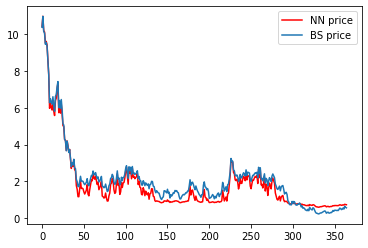

<Figure size 432x288 with 0 Axes>

In [3]:
from keras.models import load_model
import pandas as pd
import matplotlib.pyplot as plt

model = load_model('bs_model.h5')

dataset = pd.read_csv("bs_testing.csv")
X_test = dataset.iloc[:, :4].values
Y_test = dataset.iloc[:, 4].values

plt.plot(model.predict(X_test), color="red", label="NN price")
plt.plot(Y_test, label="BS price")
plt.legend()
plt.show()
plt.savefig("comparison_fair.png")

The agreement is pretty good. To illustrate how a neural network is not able to extrapolate results if the prediction is tried with inputs outside the phase-space of the training (i.e. testing sample different from the one used in the training) I have tried to predict the price of a call with different maturity (strike and vol are in the range of the training instead):

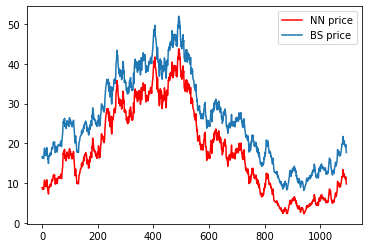

<Figure size 432x288 with 0 Axes>

In [27]:
from keras.models import load_model
import pandas as pd
import matplotlib.pyplot as plt

model = load_model('bs_model.h5')

dataset = pd.read_csv("bs_testing_off.csv")
X_test = dataset.iloc[:, :4].values
Y_test = dataset.iloc[:, 4].values

plt.plot(model.predict(X_test), color="red", label="NN price")
plt.plot(Y_test, label="BS price")
plt.legend()
plt.show()
plt.savefig("comparison_off.png")


## Technical Analysis
In finance, technical analysis is a security analysis discipline for forecasting the direction of prices through the study of past market data, primarily price and volume.
Essentially the analyst looks for particular patterns in the price time series that are *known* to develop in predictable ways to take profit of it.

<img src="H_and_s_top_new.jpg" width=400>
<img src="Triangle-ascending.jpg" width=400>

As you may imagine we will try to develop a CNN (like in the handwriting case) capable of classifying features in time series to be used in a technical analysis (this is much faster than having somebody looking at thousands of time series by eye...).

As in the previous application I have generated myself the training set simulating 9000 time series (1/3 with head and shoulder patter, 1/3 with triangle pattern and 1/3 with no pattern). To make the training easier the features have been exagerated.

<figure>
<img src="image_1.png" width=300>
<figcaption>No pattern</figcaption>
</figure>

<figure>
<img src="image_2.png" width=300>
<figcaption>Head and shoulder pattern</figcaption>
</figure>

<figure>
<img src="image_0.png" width=300>
<figcaption>Tringle pattern</figcaption>
</figure>

In [17]:
import numpy as np
import json
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv1D, Dropout
from keras.layers import MaxPooling1D, GlobalAveragePooling1D
from keras.utils import to_categorical

# load the training set
with open("training_tech_ana_labels.json", "r") as f:
    train_labels = json.load(f)

train_labels = train_labels[:900]
train_images = []

with open("training_tech_ana_images.json", "r") as f:
    train_images = json.load(f)
train_images = train_images[:900]

train_images = np.array(train_images)
train_images = np.expand_dims(train_images, axis=3)

# define the CNN 
model = Sequential()
model.add(Conv1D(filters=80, kernel_size=20, 
                 activation='relu', input_shape=(101, 1)))
model.add(Conv1D(filters=80, kernel_size=15, 
                 activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(filters=100, kernel_size=10, 
                 activation='relu'))
model.add(Conv1D(filters=100, kernel_size=5, 
                 activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
#model.add(Flatten())
#model.add(Dense(230, activation='relu'))
model.add(Dense(3, activation="softmax"))
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

# make the training
model.fit(train_images, to_categorical(train_labels), 
          epochs=150, batch_size=35, verbose=2)

model.save('tech_ana.h5')

/usr/lib/python3/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.


Epoch 1/150
 - 1s - loss: 2.0686 - acc: 0.3522
Epoch 2/150
 - 1s - loss: 1.0606 - acc: 0.3878
Epoch 3/150
 - 1s - loss: 0.9756 - acc: 0.4900
Epoch 4/150
 - 1s - loss: 0.8435 - acc: 0.5667
Epoch 5/150
 - 1s - loss: 0.7727 - acc: 0.5889
Epoch 6/150
 - 1s - loss: 0.7457 - acc: 0.6122
Epoch 7/150
 - 1s - loss: 0.6790 - acc: 0.5978
Epoch 8/150
 - 1s - loss: 0.6181 - acc: 0.6667
Epoch 9/150
 - 1s - loss: 0.6504 - acc: 0.6478
Epoch 10/150
 - 1s - loss: 0.6144 - acc: 0.6578
Epoch 11/150
 - 1s - loss: 0.6103 - acc: 0.6733
Epoch 12/150
 - 1s - loss: 0.5778 - acc: 0.6967
Epoch 13/150
 - 1s - loss: 0.6020 - acc: 0.6856
Epoch 14/150
 - 1s - loss: 0.5969 - acc: 0.6878
Epoch 15/150
 - 1s - loss: 0.6569 - acc: 0.6333
Epoch 16/150
 - 1s - loss: 0.5769 - acc: 0.6867
Epoch 17/150
 - 1s - loss: 0.5750 - acc: 0.6867
Epoch 18/150
 - 1s - loss: 0.5729 - acc: 0.6867
Epoch 19/150
 - 1s - loss: 0.5447 - acc: 0.7167
Epoch 20/150
 - 1s - loss: 0.5464 - acc: 0.7022
Epoch 21/150
 - 1s - loss: 0.5762 - acc: 0.7122
E

To test the perfomance I have created a longer time series and passed as input to the CNN a sliding time window to simulate the evolution of the price and a feature that is coming.
The goal is to check when the neural net is capable of predicting the incoming pattern.

<img src="closing_price.gif">

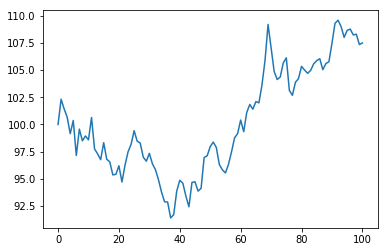

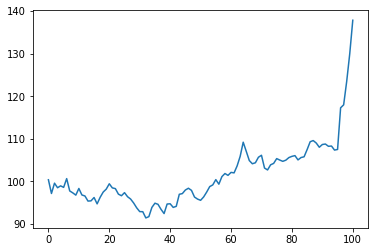

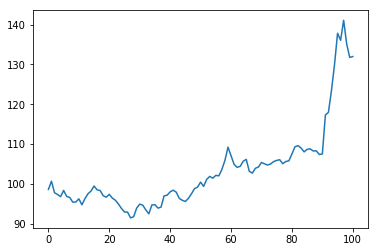

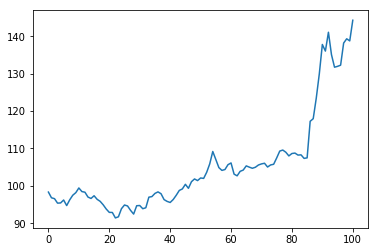

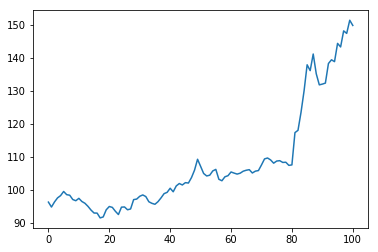

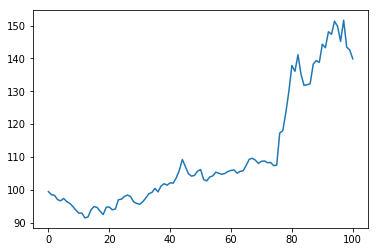

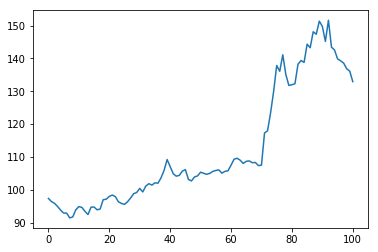

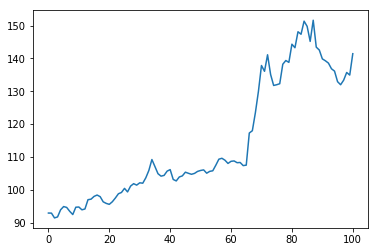

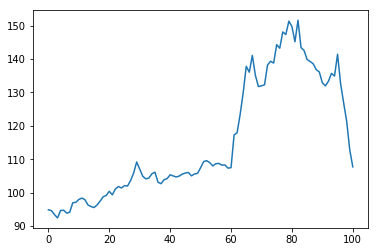

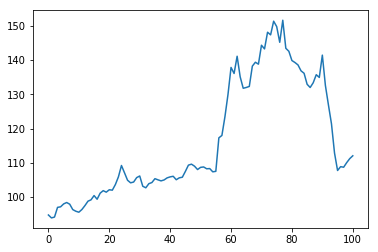

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/lib/python3/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.


0 0.9059956
0 0.9251846
0 0.9130782
0 0.93703276
0 0.96242875
1 0.56031984
1 0.95728
1 0.88402504
1 1.0
1 1.0


In [12]:
import numpy as np
import json
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv1D, Dropout, MaxPooling1D, GlobalAveragePooling1D
from keras.utils import to_categorical
from matplotlib import pyplot as plt

test_images = []

with open("testing_tech_ana_images_frames.json", "r") as f:
    test_images = json.load(f)

test_images = np.array(test_images)
for i in range(test_images.shape[0]):
    plt.plot(test_images[i, :])
    plt.show()
test_images = np.expand_dims(test_images, axis=3)

model = load_model('tech_ana_10000.h5')

predictions = model.predict(test_images)
for i in range(len(predictions)):
    print (np.argmax(predictions[i]), max(predictions[i]))

So at the 6th sample the CNN start recognizing the *head and shoulder* pattern in the price evolution.

## Exercises

### Exercise 8.1

Using the same code illustrated above, repeat the training of the ANN to recognize digits and test it with your own handwriting (e.g. try to exagerate some feature to fool the NN, or even pass it letters instead of digits and interpet the results).

### Exercise 8.2

Taking as example the pricing NN trained on call, try to price put options.

